to install see https://gdc.cancer.gov/access-data/gdc-data-transfer-tool

In [3]:
! mkdir data && cd data && gdc-client download -m gdc_manifest.2019-09-03.txt && cd .. 

ERROR: An unexpected error has occurred during normal operation of the client. Please report the following exception to GDC support <support@nci-gdc.datacommons.io>.
ERROR: ('Connection aborted.', error(61, 'Connection refused'))
Traceback (most recent call last):
  File "gdc-client", line 107, in <module>
  File "build/bdist.macosx-10.9-x86_64/egg/gdc_client/download/parser.py", line 99, in download
  File "build/bdist.macosx-10.9-x86_64/egg/gdc_client/query/versions.py", line 30, in get_latest_versions
  File "site-packages/requests/api.py", line 109, in post
  File "site-packages/requests/api.py", line 50, in request
  File "site-packages/requests/sessions.py", line 465, in request
  File "site-packages/requests/sessions.py", line 573, in send
  File "site-packages/requests/adapters.py", line 415, in send
ConnectionError: ('Connection aborted.', error(61, 'Connection refused'))
ERROR: Exiting


In [45]:
import os
import pandas as pd
import numpy as np

In [30]:
folder='../data/'
chro='18'
vps4b=63390000
smad4=51030000

In [39]:
smad4s = []
vps4bs = []
names = []
for i, val in enumerate(os.listdir(folder)):
    print(i, end="\r")
    for file in os.listdir(folder+val):
        if file[-11:]=='.seg.v2.txt':
            names.append(file.split('.')[0])
            a = pd.read_csv(folder+val+'/'+file, sep='\t')
            a_chro_only = a[(a['Chromosome']==chro)]
            smad4s.append(a_chro_only[(a_chro_only['Start']<=smad4) & (a_chro_only['End']>=smad4)]['Segment_Mean'].mean())
            vps4bs.append(a_chro_only[(a_chro_only['Start']<=vps4b) & (a_chro_only['End']>=vps4b)]['Segment_Mean'].mean())

In [135]:
vps4btosmad4 = np.nan_to_num(np.array([vps4bs,smad4s]),0)

In [136]:
vps4btosmad4

array([[ 1.800e-03, -4.000e-04, -9.273e-01, ..., -2.550e-01, -1.000e-03,
         4.716e-01],
       [ 1.800e-03, -4.000e-04, -9.398e-01, ..., -2.550e-01, -1.000e-03,
         4.271e-01]])

In [137]:
np.corrcoef(vps4btosmad4)

array([[1.        , 0.82215179],
       [0.82215179, 1.        ]])

In [138]:
vps4btosmad4 = vps4btosmad4.T

In [139]:
vps4btosmad4.mean(), vps4btosmad4.std()**2

(-0.045404379336249946, 0.04072587085138573)

In [140]:
c=0
mean = vps4btosmad4.mean()
std = 0.05
for i,val in enumerate(vps4btosmad4):
    if (val[0]>mean-std and val[0]<mean+std) or (val[1]>mean-std and val[1]<mean+std):
        vps4btosmad4 = np.delete(vps4btosmad4,i-c,0)
        c+=1

In [141]:
len(vps4btosmad4)

13434

In [142]:
np.corrcoef(vps4btosmad4.T)

array([[1.        , 0.83370586],
       [0.83370586, 1.        ]])

In [160]:
import seaborn as sns
sns.set(style="darkgrid")

In [153]:
vps4btosmad4 = np.nan_to_num(np.array([vps4bs,smad4s]),0)

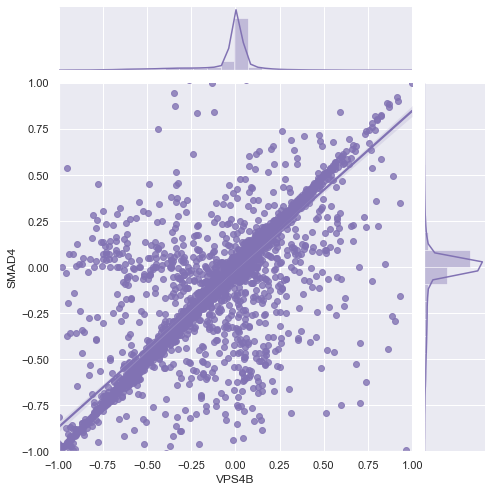

In [162]:
g = sns.jointplot("VPS4B", "SMAD4", data=pd.DataFrame(vps4btosmad4.T, index=names, columns=['VPS4B','SMAD4']), kind="reg", xlim=(-1, 1), ylim=(-1, 1), color="m", height=7)

In [163]:
g.savefig("SMAD4toVPS4Bcorrelation_cn_TCGA.pdf")